In [1]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dec22pub.csv')

In [4]:
df.describe()

,HRHHID,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,FILLER,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,...,HRFS30D1,HRFS30D2,HRFS30D3,HRFS30D4,HRFS30D5,HRFS30D6,HRFS30D7,HRFS30D8,HRFS30D9,HRFS30DE
count,1.254890e+05,125489.0,125489.0,125489.000000,125489.000000,0.0,125489.000000,125489.000000,125489.000000,125489.000000,...,125489.000000,125489.000000,125489.000000,125489.000000,125489.000000,125489.000000,125489.000000,125489.000000,125489.000000,125489.000000
mean,3.542220e+14,12.0,2022.0,0.840297,193.979193,NaN,0.899999,1.224354,0.650049,-0.868897,...,0.237917,0.310306,-0.132657,26.805855,-0.460789,-0.695742,9.885392,0.304393,-0.177155,27.053216
std,2.942318e+14,0.0,0.0,0.995641,48.269829,NaN,0.975294,1.054124,0.808248,0.608908,...,1.112513,1.235307,1.504940,128.628160,0.945217,0.672958,89.020461,1.227860,1.300735,131.588413
min,4.795111e+09,12.0,2022.0,-1.000000,1.000000,NaN,-1.000000,1.000000,-3.000000,-3.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.051001e+14,12.0,2022.0,1.000000,201.000000,NaN,1.000000,1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-6.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-6.000000
50%,2.735802e+14,12.0,2022.0,1.000000,201.000000,NaN,1.000000,1.000000,1.000000,-1.000000,...,1.000000,1.000000,0.000000,-6.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,-6.000000
75%,6.044004e+14,12.0,2022.0,1.000000,201.000000,NaN,1.000000,1.000000,1.000000,-1.000000,...,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,-1.000000
max,9.998222e+14,12.0,2022.0,9.000000,259.000000,NaN,3.000000,12.000000,2.000000,2.000000,...,3.000000,4.000000,17.000000,1216.000000,3.000000,7.000000,1150.000000,4.000000,10.000000,1105.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125489 entries, 0 to 125488
Columns: 507 entries, HRHHID to HRFS30DE
dtypes: float64(1), int64(506)
memory usage: 485.4 MB


In [21]:
selected_columns = ['PTDTRACE', 'HESP1', 'GESTFIPS']
census_subset = df[selected_columns]

census_subset = census_subset.rename(columns={'PTDTRACE': 'Race', 'HESP1': 'FoodStamp', 'GESTFIPS' : 'State'})

print(census_subset.head())

   Race  FoodStamp  State
0    -1         -1      1
1    -1         -1      1
2    -1         -1      1
3    -1         -1      1
4    -1         -1      1


In [22]:
# filter 'HESP1' to keep only values of 1 (Yes, received foodstamps) and 2 (No, did not receive foodstamps)
census_subset = df[df['HESP1'].isin([1, 2])]

selected_columns = ['PTDTRACE', 'HESP1', 'GESTFIPS']

census_subset = census_subset[selected_columns]

census_subset = census_subset.rename(columns={'PTDTRACE': 'Race', 'HESP1': 'FoodStamp', 'GESTFIPS' : 'State'})

census_subset.head()

,Race,FoodStamp,State
20,2,2,1
21,2,2,1
31,1,2,1
40,1,1,1
41,1,1,1


In [23]:
census_subset.tail()

,Race,FoodStamp,State
124989,1,1,35
124990,1,1,35
124991,1,1,35
125241,1,2,50
125242,1,2,50


In [24]:
 # 01 White Only
 # 02 Black Only
 # 03 American Indian, Alaskan Native Only
 # 04 Asian Only
 # 05 Hawaiian/Pacific Islander Only
 # 06 White-Black
 # 07 White-AI
 # 08 White-Asian
 # 09 White-HP
 # 10 Black-AI
 # 11 Black-Asian
 # 12 Black-HP
 # 13 AI-Asian
 # 14 AI-HP
 # 15 Asian-HP 

In [25]:
census_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32357 entries, 20 to 125242
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Race       32357 non-null  int64
 1   FoodStamp  32357 non-null  int64
 2   State      32357 non-null  int64
dtypes: int64(3)
memory usage: 1011.2 KB


In [26]:
census_subset.describe()

,Race,FoodStamp,State
count,32357.000000,32357.000000,32357.000000
mean,1.591742,1.767902,28.125939
std,1.803083,0.422178,16.295707
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,13.000000
50%,1.000000,2.000000,28.000000
75%,1.000000,2.000000,42.000000
max,26.000000,2.000000,56.000000


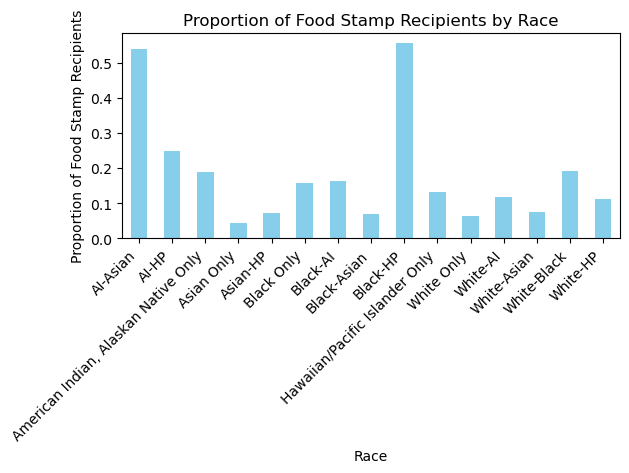

In [27]:
# Mapping for race categories
race_mapping = {
    1: 'White Only',
    2: 'Black Only',
    3: 'American Indian, Alaskan Native Only',
    4: 'Asian Only',
    5: 'Hawaiian/Pacific Islander Only',
    6: 'White-Black',
    7: 'White-AI',
    8: 'White-Asian',
    9: 'White-HP',
    10: 'Black-AI',
    11: 'Black-Asian',
    12: 'Black-HP',
    13: 'AI-Asian',
    14: 'AI-HP',
    15: 'Asian-HP'
}

df['Race'] = df['PTDTRACE'].map(race_mapping)

total_population_by_race = df['Race'].value_counts()

foodstamp_by_race = df[df['HESP1'] == 1]['Race'].value_counts()

proportion_foodstamp_by_race = foodstamp_by_race / total_population_by_race

proportion_foodstamp_by_race.plot(kind='bar', color='skyblue')
plt.title('Proportion of Food Stamp Recipients by Race')
plt.xlabel('Race')
plt.ylabel('Proportion of Food Stamp Recipients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

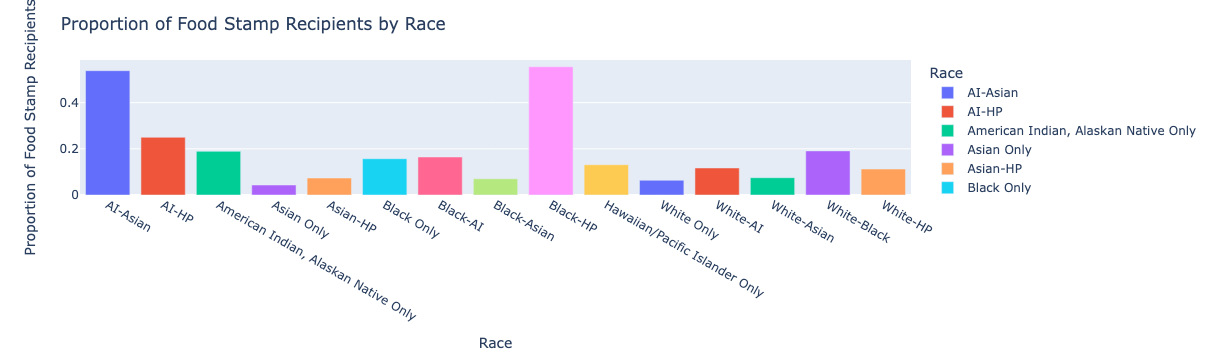

In [28]:
import plotly.express as px

df['Race'] = df['PTDTRACE'].map(race_mapping)

total_population_by_race = df['Race'].value_counts()
foodstamp_by_race = df[df['HESP1'] == 1]['Race'].value_counts()

proportion_foodstamp_by_race = foodstamp_by_race / total_population_by_race
race_pop_df = pd.DataFrame({'Race': proportion_foodstamp_by_race.index, 'Proportion': proportion_foodstamp_by_race.values})

fig = px.bar(race_pop_df, x='Race', y='Proportion', color='Race', labels={'Proportion': 'Proportion of Food Stamp Recipients'})
fig.update_layout(title='Proportion of Food Stamp Recipients by Race')
fig.show()

In [33]:
from scipy import stats

df['Race'] = df['PTDTRACE'].map(race_mapping)

correlation, p_value = stats.pointbiserialr(df['PTDTRACE'], df['HESP1'])

print("Point-Biserial Correlation:", correlation)
print("P-value:", p_value)

Point-Biserial Correlation: 0.1879741057114814
P-value: 0.0


In [48]:
from scipy.stats import pearsonr

foodstamp_data = df[df['HESP1'].isin([1, 2])]

total_individuals_by_race = df['PTDTRACE'].value_counts()

foodstamp_recipients_by_race = foodstamp_data['PTDTRACE'].value_counts()

proportion_foodstamp_by_race = foodstamp_recipients_by_race / total_individuals_by_race

correlation_data = proportion_foodstamp_by_race.reset_index()
correlation_data.columns = ['Race', 'Proportion_FoodStamp']

correlation_coef, p_value = pearsonr(correlation_data['Race'], correlation_data['Proportion_FoodStamp'])

print(correlation)
print("\nP-value:", p_value)

ValueError: array must not contain infs or NaNs